In [1]:
import dask.bag as db
import json

In [2]:
cookbooks_bag = db.read_text('./packed/packed-*.json').map(json.loads)

In [4]:
cookbooks_bag.flatten().count().compute()

954675

In [5]:
ing_len_list = cookbooks_bag.flatten().map(lambda x: len(x['ingredients'])).compute()

In [7]:
dir_len_list = cookbooks_bag.flatten().map(lambda x: len(x['directions'])).compute()

In [10]:
from matplotlib.pyplot import hist
%matplotlib inline

(array([     0.,   1001.,   8087.,  37233.,  72331., 113352., 146135.,
        145546., 127463.,  99566.,  76506.,  52650.,  32817.,  18626.,
         10499.,   5519.,   3046.,   1601.,    923.,    552.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

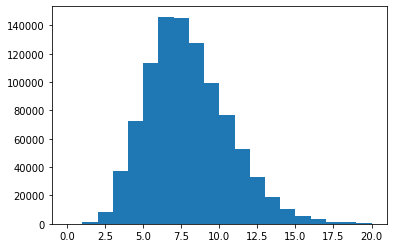

In [15]:
hist(list(filter(lambda x: x < 20 , ing_len_list)), bins = range(0,21))

(array([     0., 103407.,  93415., 121065., 134292., 128646., 108543.,
         83072.,  58650.,  39813.,  25771.,  16331.,  10561.,   6895.,
          4763.,   3439.,   2682.,   2026.,   1715.,   1415.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

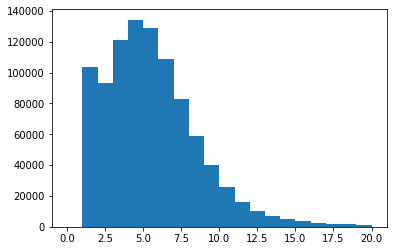

In [16]:
hist(list(filter(lambda x: x < 20 , dir_len_list)), bins = range(0,21))

In [17]:
import pandas as pd

In [18]:
frame = pd.DataFrame({"ingredients length": ing_len_list, "directions length": dir_len_list})

In [19]:
frame.describe()

,ingredients length,directions length
count,954675.000000,954675.000000
mean,7.478333,5.248840
std,2.832076,3.625132
min,1.000000,1.000000
25%,6.000000,3.000000
50%,7.000000,5.000000
75%,9.000000,7.000000
max,407.000000,75.000000


Curious case with total 407 ingredients

In [20]:
cookbooks_bag.flatten().filter(lambda x: len(x["ingredients"]) == 407).compute()

[{'title': "grandma's chicken fricassee",
  'ingredients': ['1  lb. chopped meat',
   '1  egg',
   '1/2  c. seasoned bread crumbs',
   '2  Tbsp. ketchup',
   '1  tsp. salt',
   '1/2  tsp. pepper',
   '6  to 7 potatoes (medium)',
   '2 1/2  lb. ham end',
   '1  c. milk',
   '4  Tbsp. seasoned bread crumbs',
   '4  Tbsp. butter',
   '1  lb. ham steak, cubed',
   '2  c. celery, sliced',
   '3/4  c. mayonnaise',
   '1  can chunky chicken soup',
   '2  Tbsp. lemon juice',
   '3  eggs, hard-boiled and cut up',
   '1 (8 oz.)  can mushroom stems and pieces',
   '1  c. walnuts',
   '1/2  c. butter',
   '2  c. stuffing mix',
   '12  oz. corn bread twists',
   '1  lb. ground ham',
   '1  can Cheddar cheese soup',
   '1  c. seasoned bread crumbs',
   '1  pkg. onion soup mix',
   '4  Tbsp. butter, divided',
   '4  Tbsp. flour, divided',
   '2  tsp. seasoned salt, divided',
   '2 to 2 1/2  lb. boneless veal',
   '1  Tbsp. paprika, divided',
   '1  can chicken broth',
   '1/2  lb. mushrooms, sliced',

It's not a mistake - [check](http://www.cookbooks.com/Recipe-Details.aspx?id=301776)